c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


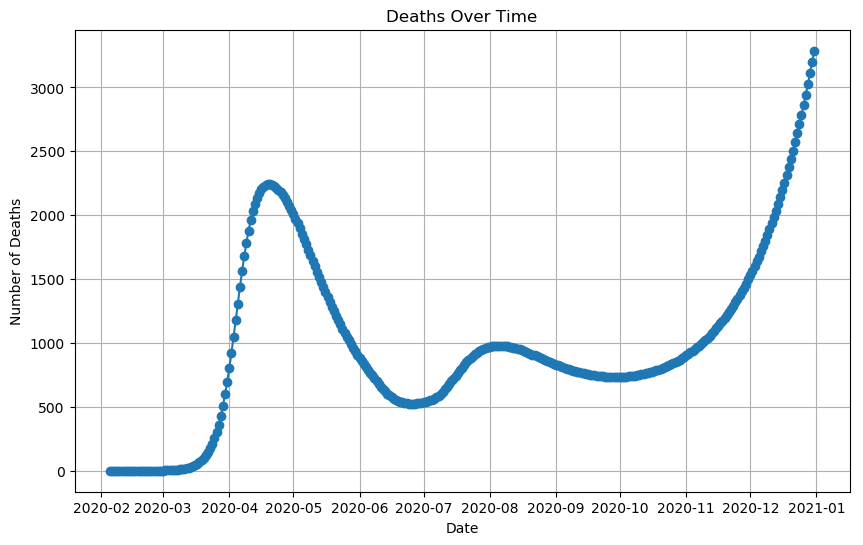

In [5]:
# plot the estimated number of deaths by SEIR model 
import pandas as pd 
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('results\\task_1_US_simulations.csv')

# Step 2: Extract the "dates" and "deaths" columns
dates = pd.to_datetime(df['dates'])  # Convert dates to datetime format
deaths = df['deaths'] 

# Step 3: Plot Time Series
plt.figure(figsize=(10, 6))
plt.plot(dates, deaths, marker='o', linestyle='-')
plt.title('Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

In [9]:
import matplotlib.pyplot as plt 
import pandas as pd
def get_true_daily_deaths(simulation_end_date = '2021-12-31'):
    
    # Step 1: Read the CSV file into a DataFrame
    true_deaths_df = pd.read_csv('data\\time_series_covid19_deaths_US.csv')

    # Step 2: Drop unnecessary columns
    columns_to_drop = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
                    'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population']
    true_deaths_df.drop(columns=columns_to_drop, inplace=True) 
    

    # Step 3: Sum death counts across all states for each date
    true_deaths_df = true_deaths_df.transpose()  # Transpose DataFrame 
    true_deaths_df['total_deaths'] = true_deaths_df.sum(axis=1)  
    
    # Step 4: Drop not necessaary columns  
    true_deaths_df = true_deaths_df.iloc[:, [-1]] 

    # Step 5: Filter data to include only dates starting from 2020-02-05 and ending at 2020-12-31   
    true_deaths_df.index = pd.to_datetime(true_deaths_df.index, format='%m/%d/%y')
    true_deaths_df = true_deaths_df.loc['2020-02-04':simulation_end_date]
    # print(true_deaths_df.head())
    daily_deaths = true_deaths_df['total_deaths'].diff()  # get daily deaths from accum deaths 

    return daily_deaths[1:]

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matp

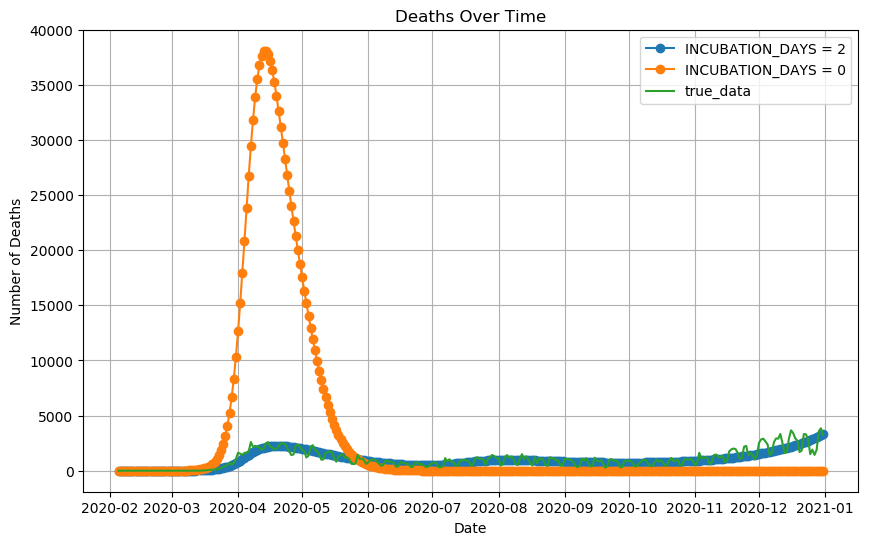

In [22]:
## Expore what happen if INCUBATION_DAYS = 0 (original value is 2)
import pandas as pd 
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df1 = pd.read_csv('results\\task_1_US_simulations.csv')
df2 = pd.read_csv('results\\no_incubation_simulations.csv')

# Step 2: Extract the "dates"  
dates = pd.to_datetime(df1['dates'])  # Convert dates to datetime format 
true_deaths = get_true_daily_deaths("2020-12-31")
# Step 3: Plot Time Series
plt.figure(figsize=(10, 6))
plt.plot(dates, df1["deaths"], marker='o', linestyle='-', label="INCUBATION_DAYS = 2")
plt.plot(dates, df2["deaths"], marker='o', linestyle='-', label="INCUBATION_DAYS = 0")
plt.plot(dates, true_deaths, linestyle='-', label = "true_data")
plt.legend()
plt.title('Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.savefig("results//incubation_periods_experiment.png")
plt.show()

### The impacts of incubation day: 

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matp

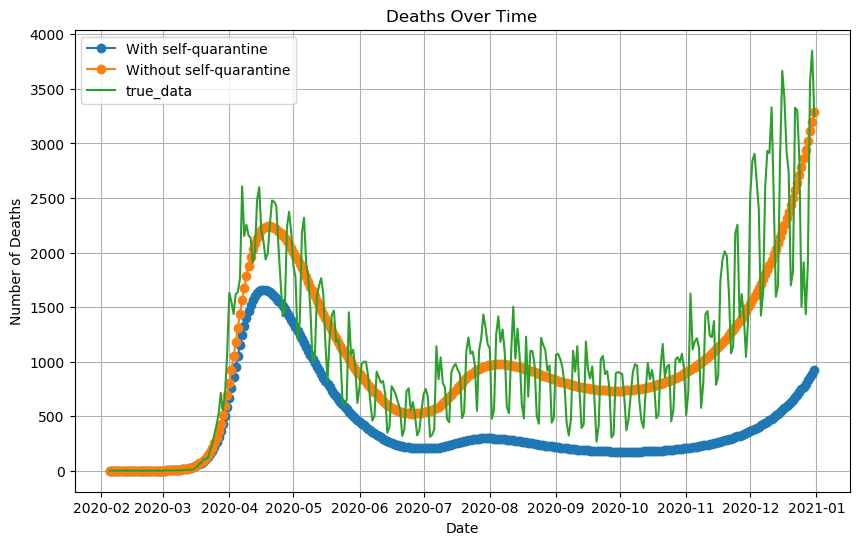

In [23]:
## Expore what happen if simulatin self-quarantine 
import pandas as pd 
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df1 = pd.read_csv('results\\with_quarantine.csv')
df2 = pd.read_csv('results\\no_quarantine.csv')

# Step 2: Extract the "dates"  
dates = pd.to_datetime(df1.iloc[:,0])  # Convert dates to datetime format 
true_deaths = get_true_daily_deaths("2020-12-31")
# Step 3: Plot Time Series
plt.figure(figsize=(10, 6))
plt.plot(dates, df1["deaths"], marker='o', linestyle='-', label="With self-quarantine")
plt.plot(dates, df2["deaths"], marker='o', linestyle='-', label="Without self-quarantine")
plt.plot(dates, true_deaths, linestyle='-', label = "true_data")
plt.legend()
plt.title('Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.savefig("results//simulating_quarantine.png")
plt.show()

### The impacts of incubation day: 

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotli

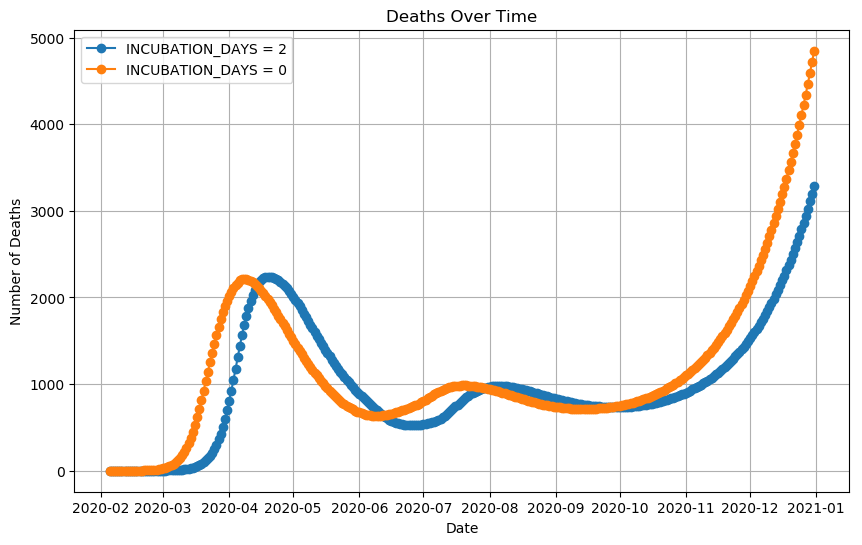

In [1]:
## Expore what happen if DAYS_BEFORE_DEATH = 7 (original value is 22)
import pandas as pd 
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df1 = pd.read_csv('results\\task_1_US_simulations.csv')
df2 = pd.read_csv('results\\no_days_before_deaths.csv')

# Step 2: Extract the "dates"  
dates = pd.to_datetime(df1['dates'])  # Convert dates to datetime format 

# Step 3: Plot Time Series
plt.figure(figsize=(10, 6))
plt.plot(dates, df1["deaths"], marker='o', linestyle='-', label="INCUBATION_DAYS = 2")
plt.plot(dates, df2["deaths"], marker='o', linestyle='-', label="INCUBATION_DAYS = 0")
plt.legend()
plt.title('Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show() 

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matp

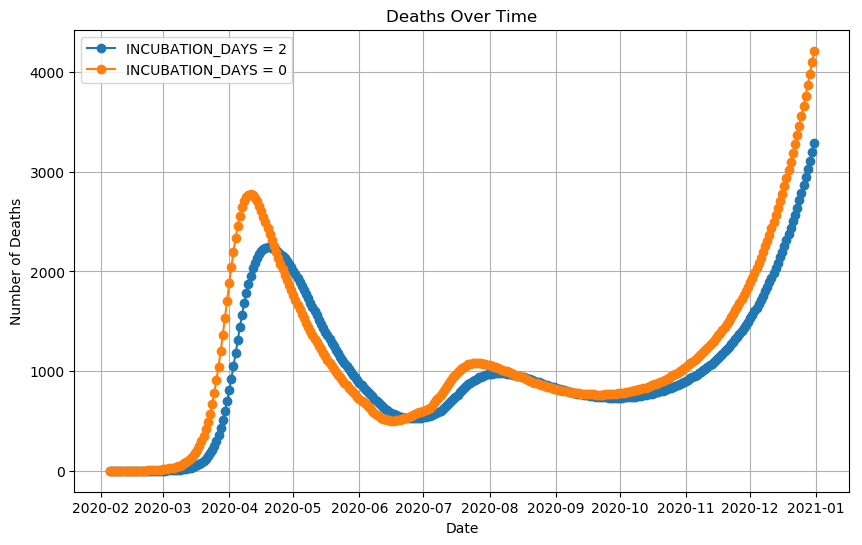

In [2]:
## Expore what happen if use true deaths instead of reported deaths
import pandas as pd 
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df1 = pd.read_csv('results\\task_1_US_simulations.csv')
df2 = pd.read_csv('results\\true_insteadof_reported_deaths.csv')

# Step 2: Extract the "dates"  
dates = pd.to_datetime(df1['dates'])  # Convert dates to datetime format 

# Step 3: Plot Time Series
plt.figure(figsize=(10, 6))
plt.plot(dates, df1["deaths"], marker='o', linestyle='-', label="INCUBATION_DAYS = 2")
plt.plot(dates, df2["deaths"], marker='o', linestyle='-', label="INCUBATION_DAYS = 0")
plt.legend()
plt.title('Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()
 

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotli

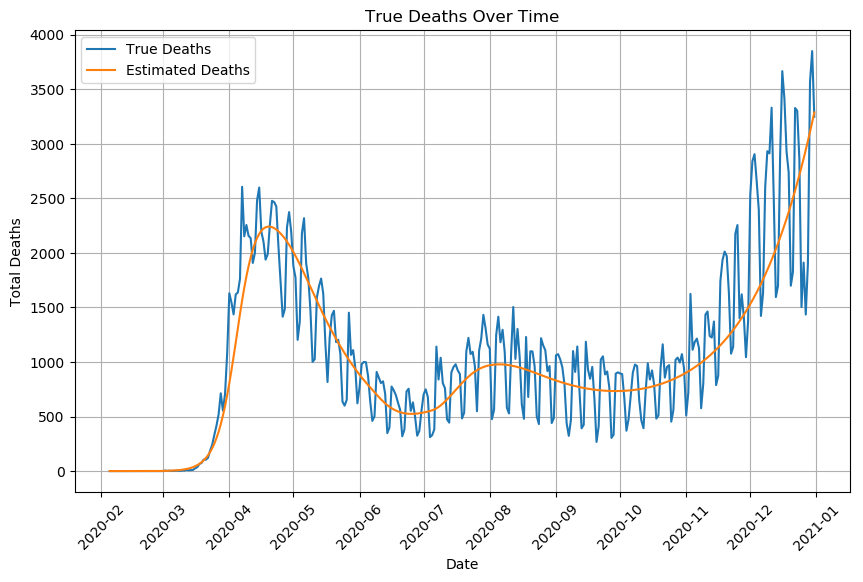

In [4]:
## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt
# Step 1: Read the CSV file into a DataFrame
true_deaths_df = pd.read_csv('data\\time_series_covid19_deaths_US.csv')

# Step 2: Drop unnecessary columns
columns_to_drop = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
                   'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population']
true_deaths_df.drop(columns=columns_to_drop, inplace=True) 
 

# Step 3: Sum death counts across all states for each date
true_deaths_df = true_deaths_df.transpose()  # Transpose DataFrame 
true_deaths_df['total_deaths'] = true_deaths_df.sum(axis=1)  
 
# Step 4: Drop not necessaary columns  
true_deaths_df = true_deaths_df.iloc[:, [-1]] 

# Step 5: Filter data to include only dates starting from 2020-02-05 and ending at 2020-12-31   
true_deaths_df.index = pd.to_datetime(true_deaths_df.index, format='%m/%d/%y')
true_deaths_df = true_deaths_df.loc['2020-02-04':'2020-12-31']
# print(true_deaths_df.head())
daily_deaths = true_deaths_df['total_deaths'].diff()  # get daily deaths from accum deaths 

# read simulated data 
df = pd.read_csv('results\\task_1_US_simulations.csv')  
simulation_deaths = df['deaths'] 

# Step 6: Plot the aggregated death data
plt.figure(figsize=(10, 6))
plt.plot(true_deaths_df.index[1:], daily_deaths[1:], label='True Deaths')
plt.plot(true_deaths_df.index[1:], simulation_deaths, label='Estimated Deaths')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('True Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotli

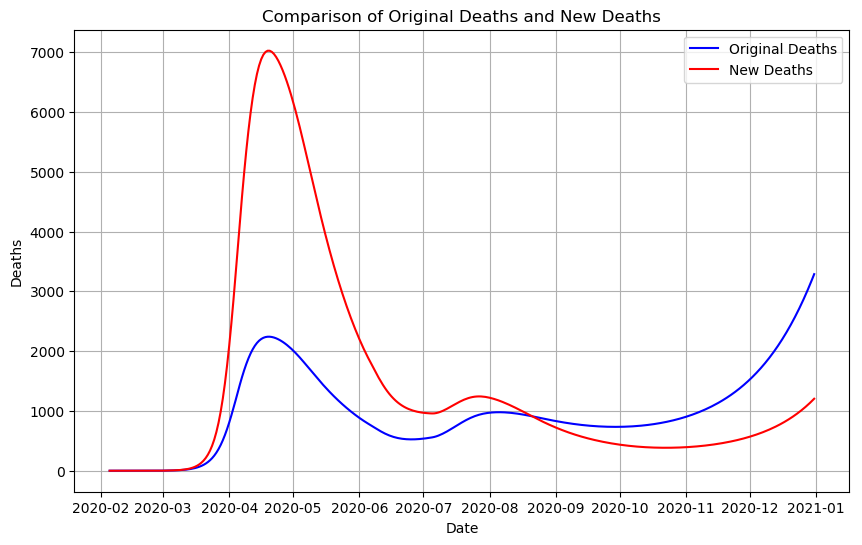

In [60]:
## Task 2.  If the initial R0 of the model was increased by 20% how many more deaths would have occurred compared to the model’s original prediction in the US? 
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df_1 = pd.read_csv('results\\task_1_US_simulations.csv')
df_2 = pd.read_csv('results\\task_2_US_simulations.csv')

# Step 2: Extract the "dates" and "deaths" columns
dates = pd.to_datetime(df_1['dates'])  # Convert dates to datetime format
deaths_orig = df_1['deaths'] 
deaths_new = df_2['deaths'] 

# Step 3: Plot original deaths and new deaths
plt.figure(figsize=(10, 6))
plt.plot(dates, deaths_orig, label='Original Deaths', color='blue')
plt.plot(dates, deaths_new, label='New Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Comparison of Original Deaths and New Deaths')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotli

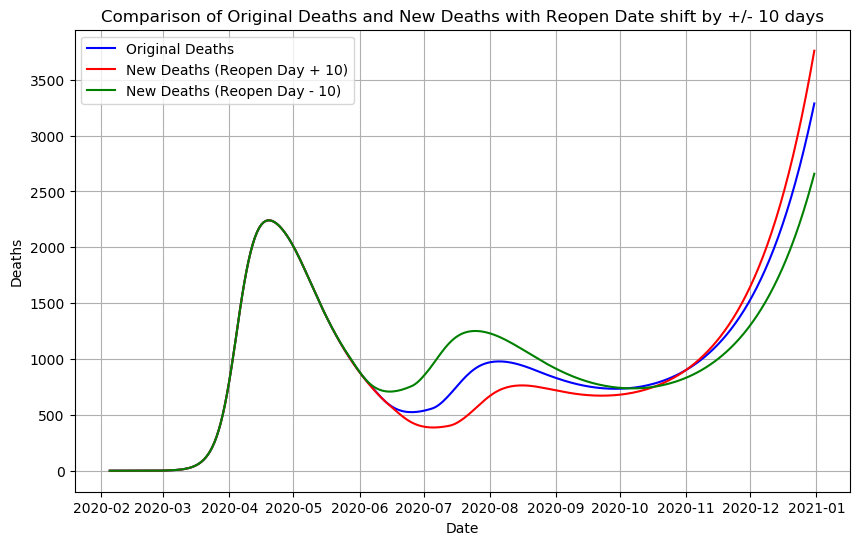

In [61]:
## Task 3.  If the opening date in the US was increased by 10 days or decreased by 10 days how would the death toll change compared to the model’s original prediction in the US? 
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df_1 = pd.read_csv('results\\task_1_US_simulations.csv')
df_3a = pd.read_csv('results\\task_3a_US_simulations.csv')
df_3b = pd.read_csv('results\\task_3b_US_simulations.csv')

# Step 2: Extract the "dates" and "deaths" columns
dates = pd.to_datetime(df_1['dates'])  # Convert dates to datetime format
deaths_orig = df_1['deaths'] 
deaths_reopen_shift_a = df_3a['deaths'] 
deaths_reopen_shift_b = df_3b['deaths'] 

# Step 3: Plot original deaths and new deaths
plt.figure(figsize=(10, 6))
plt.plot(dates, deaths_orig, label='Original Deaths', color='blue')
plt.plot(dates, deaths_reopen_shift_a, label='New Deaths (Reopen Day + 10)', color='red')
plt.plot(dates, deaths_reopen_shift_b, label='New Deaths (Reopen Day - 10)', color='green')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Comparison of Original Deaths and New Deaths with Reopen Date shift by +/- 10 days')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotli

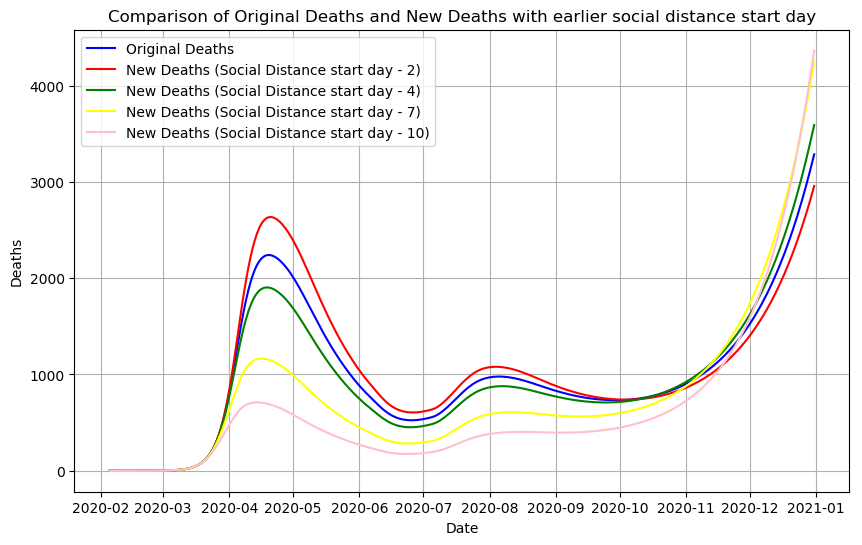

In [62]:
## Task 4. According to this model, how many fewer deaths would have occurred if the social distancing 
# in the US had started just 2 days earlier? How about 4, 7, and 10 days?

import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df_1 = pd.read_csv('results\\task_1_US_simulations.csv')
df_4a = pd.read_csv('results\\task_4a_US_simulations.csv')
df_4b = pd.read_csv('results\\task_4b_US_simulations.csv')
df_4c = pd.read_csv('results\\task_4c_US_simulations.csv')
df_4d = pd.read_csv('results\\task_4d_US_simulations.csv')

# Step 2: Extract the "dates" and "deaths" columns
dates = pd.to_datetime(df_1['dates'])  # Convert dates to datetime format
deaths_orig = df_1['deaths'] 
deaths_new_a = df_4a['deaths'] 
deaths_new_b = df_4b['deaths'] 
deaths_new_c = df_4c['deaths'] 
deaths_new_d = df_4d['deaths'] 

# Step 3: Plot original deaths and new deaths
plt.figure(figsize=(10, 6))
plt.plot(dates, deaths_orig, label='Original Deaths', color='blue')
plt.plot(dates, deaths_new_a, label='New Deaths (Social Distance start day - 2)', color='red') 
plt.plot(dates, deaths_new_b, label='New Deaths (Social Distance start day - 4)', color='green') 
plt.plot(dates, deaths_new_c, label='New Deaths (Social Distance start day - 7)', color='yellow') 
plt.plot(dates, deaths_new_d, label='New Deaths (Social Distance start day - 10)', color='pink') 
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Comparison of Original Deaths and New Deaths with earlier social distance start day')
plt.legend()
plt.grid(True)
plt.show()